In [ ]:
# Author: Md Junayed Hasan
# The goal is to understand the data based on visualzation
# with the real experimental observation and
# subject matter expertise (SME)

Process original - processed data

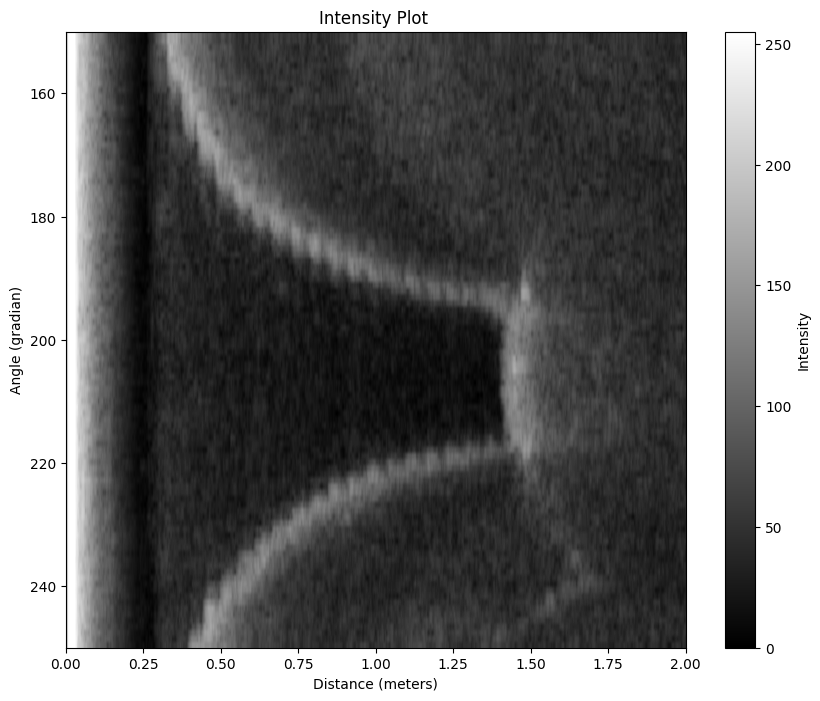

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the reference CSV file again for modifications
reference_df = pd.read_csv('C:/Users/JH11272/Desktop/GitArch/Ping360-Capture-analysis-and-AI/Processed Data after Record/2024-03-13 15-50-16Gain_0_Results.csv')

# Plotting the modified data
fig, ax = plt.subplots(figsize=(10, 8))

# Dropping the angle column for the image display
im = ax.imshow(reference_df.drop(columns=['Angle (gradian)']),
               aspect='auto',
               cmap='gray',
               extent=[0, 2, reference_df['Angle (gradian)'].max(), reference_df['Angle (gradian)'].min()])

# Setting the title and labels
ax.set_title('Intensity Plot ')
ax.set_xlabel('Distance (meters)')
ax.set_ylabel('Angle (gradian)')

# Adding a color bar to represent intensity values
fig.colorbar(im, ax=ax, orientation='vertical', label='Intensity')

# Display the plot
plt.show()

(1201, 2402)


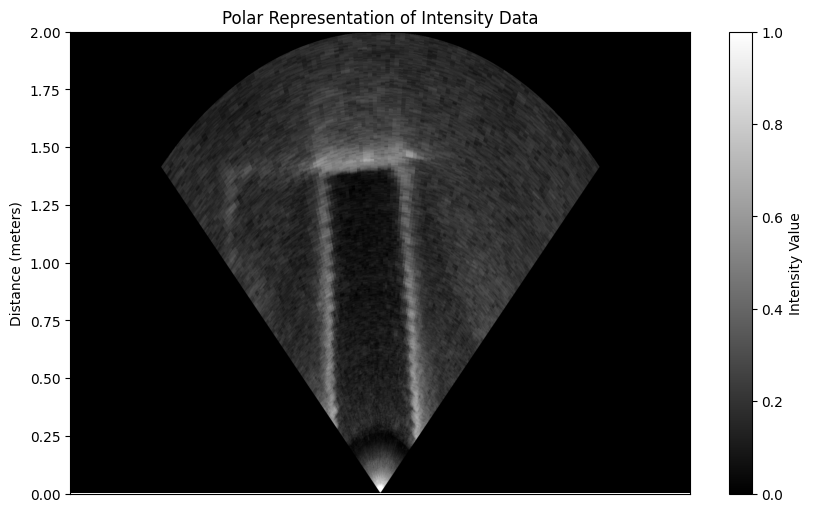

In [2]:
# Now lets check how does it look like in Polar coordinate
# Cart to Polar
import pandas as pd
import numpy as np

# Select the relevant rows (6 to 96 in MATLAB, which corresponds to 5 to 95 in Python due to zero-based indexing)
df_selected = reference_df

# Convert the DataFrame to a numpy array
T1 = df_selected.to_numpy()

# Initialize the polar map matrix with zeros
cells_number = T1.shape[1]
polar_map_matrix = np.zeros((cells_number, 2 * cells_number))

# Assuming the sonar position is at the bottom for this example
sonar_position = "Bottom"

if sonar_position == "Bottom":
    for i in range(T1.shape[0]):  # Number of angles
        Degree_Angle = (T1[i, 0] - 100) * 0.9
        for j in range(1, T1.shape[1] - 1):  # Number of samples for each angle
            if i == 1:  # Adjusting for zero-based indexing
                for k in range(91):  # 0 to 90
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255
            elif i > 1:
                for k in range(100):  # 0 to 99
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255

# For demonstration, let's print the shape of the polar_map_matrix
print(polar_map_matrix.shape)



# Simplified placeholder for demonstration
cells_number = 1200  # Assuming a similar size as in the provided code snippet
image_data = polar_map_matrix


# Plotting the image without x-axis labels or legend
plt.figure(figsize=(10, 6))
plt.imshow(image_data, aspect='auto', cmap='gray', extent=[0, image_data.shape[1], 0, 2])  # Keeping the original x-axis extent
plt.colorbar(label='Intensity Value')  # Adding a color bar
plt.title('Polar Representation of Intensity Data')
plt.ylabel('Distance (meters)')  # Setting the y-axis as requested
plt.xticks([])  # Removing x-axis labels
plt.show()

Filteration process start from here

In [3]:
# take a copy
data = reference_df

# Observation details
# In the original data, we can observe that at least till .30 meter there is nothing, only noise.
# According to Ping360 guidebook, it can not give us any result accurate in less that .75 meters. 
# however, we tried 
# and relied on our observation.

# Also, we have conducted the experiment on a simulated samll tank environment, therefore,
# we are also not intertesed after the pool boundary ends. 
# The pool ending is roughly around 1.40 meter from the position of the sensor.
# Therefore, that is approximately index 830.

# Define the column index up to which to set values to zero -- based on the above explanation
user_defined_index_low = 180  
user_defined_index_high = 830

# lest refine the data
# Set all values to zero up to the specified index in all rows, excluding the angle column
data.iloc[:, 1:user_defined_index_low+1] = 0
data.iloc[:, user_defined_index_high+1:] = 0

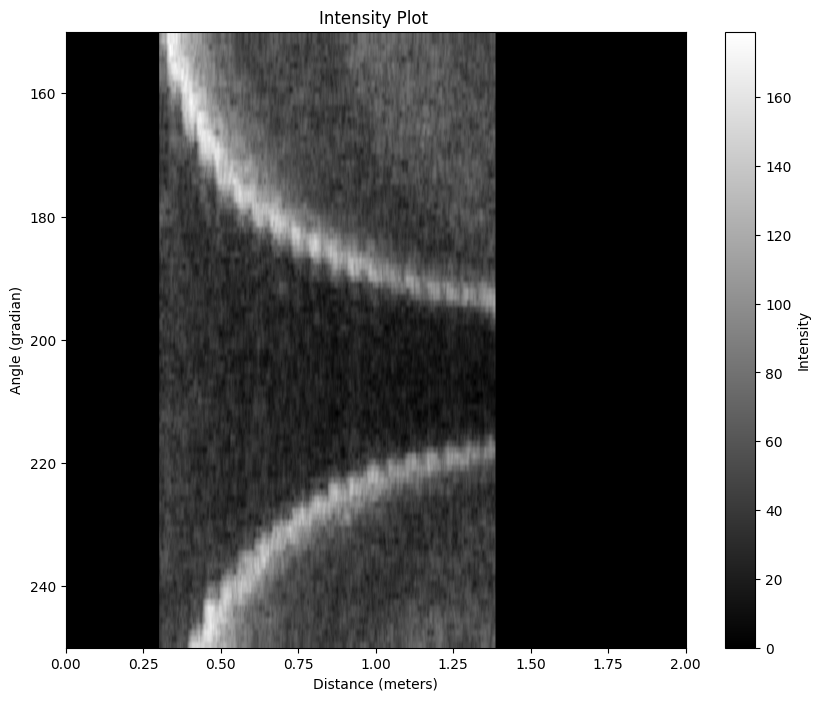

In [4]:
# Plotting the modified data
fig, ax = plt.subplots(figsize=(10, 8))

# Dropping the angle column for the image display
im = ax.imshow(data.drop(columns=['Angle (gradian)']),
               aspect='auto',
               cmap='gray',
               extent=[0, 2, data['Angle (gradian)'].max(), data['Angle (gradian)'].min()])

# Setting the title and labels
ax.set_title('Intensity Plot ')
ax.set_xlabel('Distance (meters)')
ax.set_ylabel('Angle (gradian)')

# Adding a color bar to represent intensity values
fig.colorbar(im, ax=ax, orientation='vertical', label='Intensity')

# Display the plot
plt.show()

(1201, 2402)


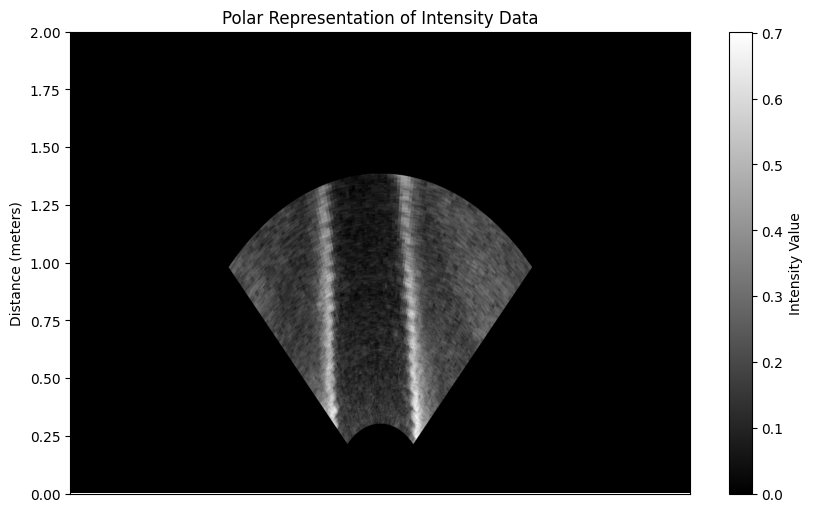

In [5]:
# lets see how does it look in polar co-ordinate
df_selected = data

# Convert the DataFrame to a numpy array
T1 = df_selected.to_numpy()

# Initialize the polar map matrix with zeros
cells_number = T1.shape[1]
polar_map_matrix = np.zeros((cells_number, 2 * cells_number))

# Assuming the sonar position is at the bottom for this example
sonar_position = "Bottom"

if sonar_position == "Bottom":
    for i in range(T1.shape[0]):  # Number of angles
        Degree_Angle = (T1[i, 0] - 100) * 0.9
        for j in range(1, T1.shape[1] - 1):  # Number of samples for each angle
            if i == 1:  # Adjusting for zero-based indexing
                for k in range(91):  # 0 to 90
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255
            elif i > 1:
                for k in range(100):  # 0 to 99
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255

# For demonstration, let's print the shape of the polar_map_matrix
print(polar_map_matrix.shape)



# Simplified placeholder for demonstration
cells_number = 1200  # Assuming a similar size as in the provided code snippet
image_data = polar_map_matrix


# Plotting the image without x-axis labels or legend
plt.figure(figsize=(10, 6))
plt.imshow(image_data, aspect='auto', cmap='gray', extent=[0, image_data.shape[1], 0, 2])  # Keeping the original x-axis extent
plt.colorbar(label='Intensity Value')  # Adding a color bar
plt.title('Polar Representation of Intensity Data')
plt.ylabel('Distance (meters)')  # Setting the y-axis as requested
plt.xticks([])  # Removing x-axis labels
plt.show()

The data so far we have seen is for empty pool.
Now, what about if we put an object, and how it would look like ? 
We have demo data included in this directory, that has an object in it. 
Lets examine that.

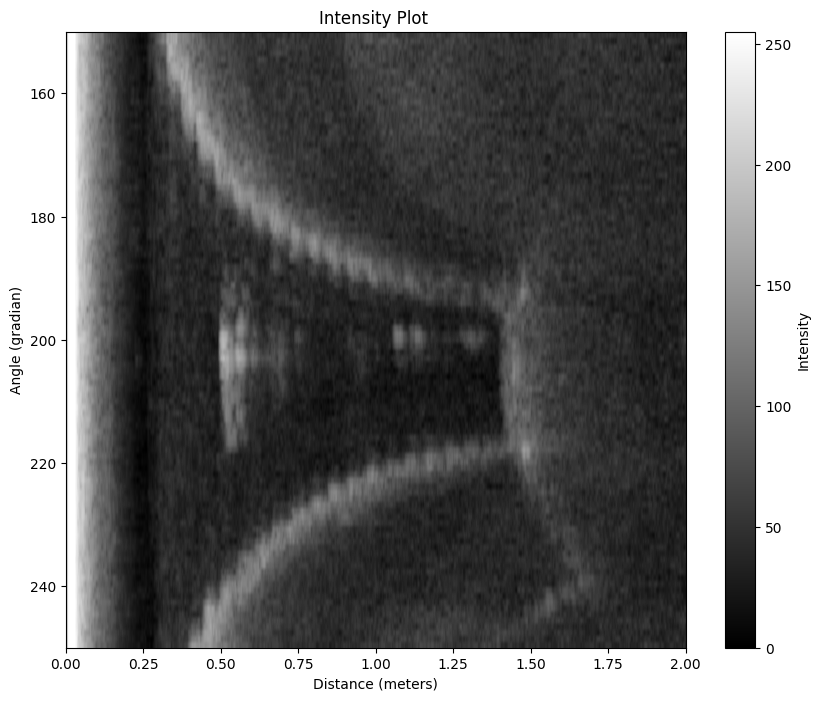

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Before processing
# Load the reference CSV file again for modifications
reference_df_o = pd.read_csv('Object - Data Demo.csv')

# Plotting the modified data
fig, ax = plt.subplots(figsize=(10, 8))

# Dropping the angle column for the image display
im = ax.imshow(reference_df_o.drop(columns=['Angle (gradian)']),
               aspect='auto',
               cmap='gray',
               extent=[0, 2, reference_df_o['Angle (gradian)'].max(), reference_df_o['Angle (gradian)'].min()])

# Setting the title and labels
ax.set_title('Intensity Plot ')
ax.set_xlabel('Distance (meters)')
ax.set_ylabel('Angle (gradian)')

# Adding a color bar to represent intensity values
fig.colorbar(im, ax=ax, orientation='vertical', label='Intensity')

# Display the plot
plt.show()

(1201, 2402)


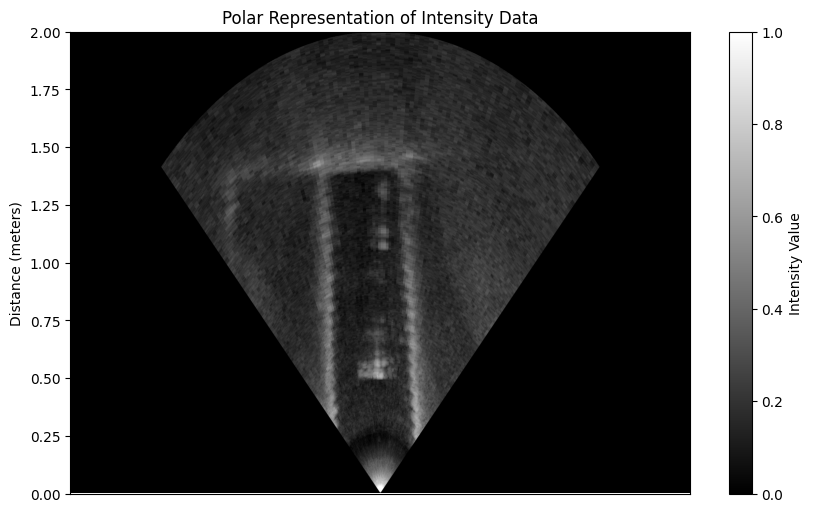

In [6]:
# There is object inside, isn't it cool ?

# Cart to Polar

# Select the relevant rows 
df_selected = reference_df_o

# Convert the DataFrame to a numpy array
T1 = df_selected.to_numpy()

# Initialize the polar map matrix with zeros
cells_number = T1.shape[1]
polar_map_matrix = np.zeros((cells_number, 2 * cells_number))

# Assuming the sonar position is at the bottom for this example
sonar_position = "Bottom"

if sonar_position == "Bottom":
    for i in range(T1.shape[0]):  # Number of angles
        Degree_Angle = (T1[i, 0] - 100) * 0.9
        for j in range(1, T1.shape[1] - 1):  # Number of samples for each angle
            if i == 1:  # Adjusting for zero-based indexing
                for k in range(91):  # 0 to 90
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255
            elif i > 1:
                for k in range(100):  # 0 to 99
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255

# For demonstration, let's print the shape of the polar_map_matrix
print(polar_map_matrix.shape)



# Simplified placeholder for demonstration
cells_number = 1200  # Assuming a similar size as in the provided code snippet
image_data = polar_map_matrix


# Plotting the image without x-axis labels or legend
plt.figure(figsize=(10, 6))
plt.imshow(image_data, aspect='auto', cmap='gray', extent=[0, image_data.shape[1], 0, 2])  # Keeping the original x-axis extent
plt.colorbar(label='Intensity Value')  # Adding a color bar
plt.title('Polar Representation of Intensity Data')
plt.ylabel('Distance (meters)')  # Setting the y-axis as requested
plt.xticks([])  # Removing x-axis labels
plt.show()

We can see the object.
Now lets do the SME based filteration on this data

In [7]:
# take a copy
data_o = reference_df_o

# Observation details
# In the original data, we can observe that at least till .30 meter there is nothing, only noise.
# According to Ping360 guidebook, it can not give us any result accurate in less that .75 meters. 
# however, we tried 
# and relied on our observation.

# Also, we have conducted the experiment on a simulated samll tank environment, therefore,
# we are also not intertesed after the pool boundary ends. 
# The pool ending is roughly around 1.40 meter from the position of the sensor.
# Therefore, that is approximately index 830.

# Define the column index up to which to set values to zero -- based on the above explanation
user_defined_index_low = 180  
user_defined_index_high = 830

# lest refine the data
# Set all values to zero up to the specified index in all rows, excluding the angle column
data_o.iloc[:, 1:user_defined_index_low+1] = 0
data_o.iloc[:, user_defined_index_high+1:] = 0

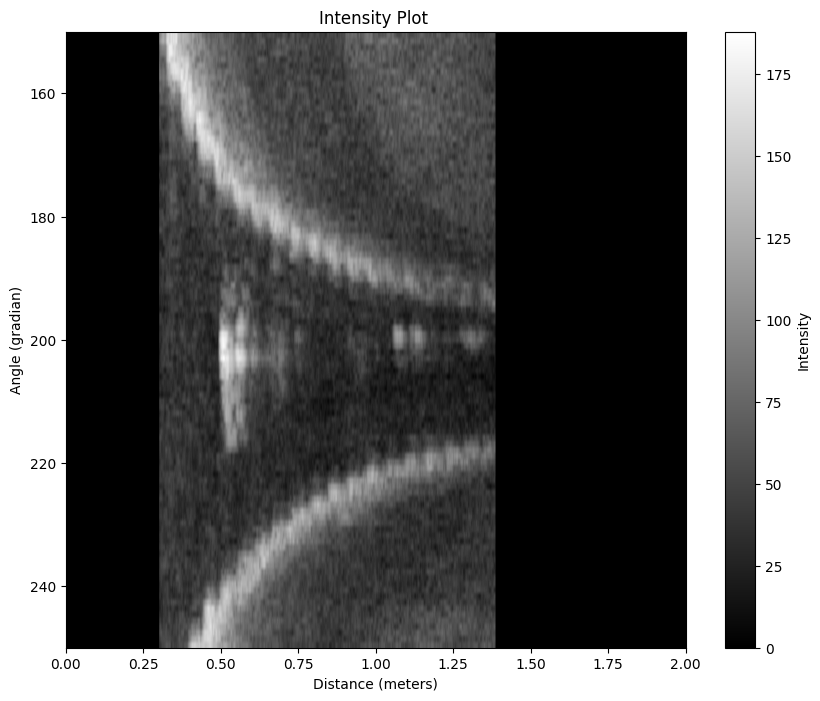

In [8]:
# Plotting the modified data
fig, ax = plt.subplots(figsize=(10, 8))

# Dropping the angle column for the image display
im = ax.imshow(data_o.drop(columns=['Angle (gradian)']),
               aspect='auto',
               cmap='gray',
               extent=[0, 2, data_o['Angle (gradian)'].max(), data_o['Angle (gradian)'].min()])

# Setting the title and labels
ax.set_title('Intensity Plot ')
ax.set_xlabel('Distance (meters)')
ax.set_ylabel('Angle (gradian)')

# Adding a color bar to represent intensity values
fig.colorbar(im, ax=ax, orientation='vertical', label='Intensity')

# Display the plot
plt.show()

(1201, 2402)


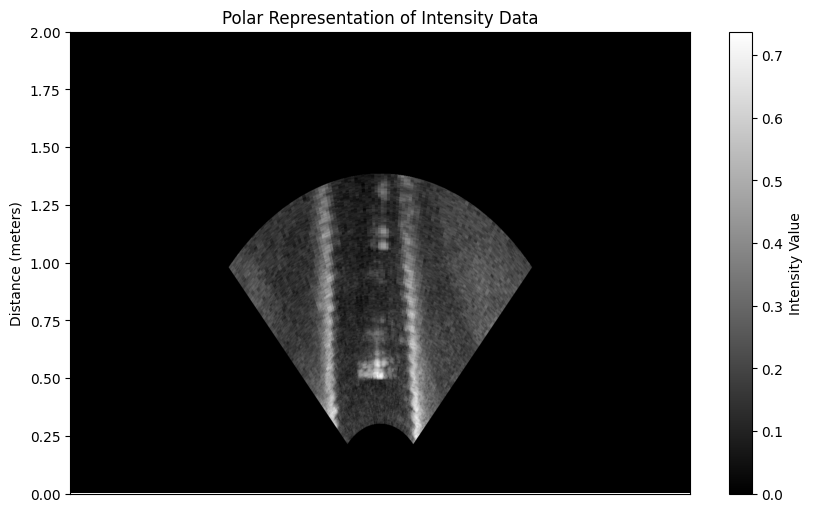

In [9]:
# lets see how does it look in polar co-ordinate
df_selected = data_o

# Convert the DataFrame to a numpy array
T1 = df_selected.to_numpy()

# Initialize the polar map matrix with zeros
cells_number = T1.shape[1]
polar_map_matrix = np.zeros((cells_number, 2 * cells_number))

# Assuming the sonar position is at the bottom for this example
sonar_position = "Bottom"

if sonar_position == "Bottom":
    for i in range(T1.shape[0]):  # Number of angles
        Degree_Angle = (T1[i, 0] - 100) * 0.9
        for j in range(1, T1.shape[1] - 1):  # Number of samples for each angle
            if i == 1:  # Adjusting for zero-based indexing
                for k in range(91):  # 0 to 90
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255
            elif i > 1:
                for k in range(100):  # 0 to 99
                    x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                    polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = T1[i, j] / 255

# For demonstration, let's print the shape of the polar_map_matrix
print(polar_map_matrix.shape)



# Simplified placeholder for demonstration
cells_number = 1200  # Assuming a similar size as in the provided code snippet
image_data = polar_map_matrix


# Plotting the image without x-axis labels or legend
plt.figure(figsize=(10, 6))
plt.imshow(image_data, aspect='auto', cmap='gray', extent=[0, image_data.shape[1], 0, 2])  # Keeping the original x-axis extent
plt.colorbar(label='Intensity Value')  # Adding a color bar
plt.title('Polar Representation of Intensity Data')
plt.ylabel('Distance (meters)')  # Setting the y-axis as requested
plt.xticks([])  # Removing x-axis labels
plt.show()

In this notebook we understand, how can SME based data cleaning works.
Now in notebook 2, we will further process the data, based on statistical 
thresholding.